# SGDCT for parameter estimation

Author: Eliott Van Dieren - Imperial College London, EPFL

Supervisors: Prof. Grigorios Pavliotis, Prof. Fabio Nobile

Data not included but can be produced via utility functions in utils.py. Namely, use "utils.gen_data(n_step,dt,T,dict_,directory,model)"

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
from tqdm import tqdm
import scipy.stats as st
import scipy.special as sp
from pathlib import Path
import utils
import models

## On the circle

### Multi-Cosine

#### Baseline

In [3]:
T = 5e4
N = 2
J = 4
n_steps = 5
dt = 1e-2

In [10]:
model = "potential_multicos"
directory = "data"
path = Path(f"./{directory}/{model}")
w_true = 1/np.arange(1,J+1)
print(w_true)
dict_ = models.dict_(model,N,J,w_true)
#utils.gen_data(n_steps,dt,T,dict_,directory,model)

# asserting the loading is correct
X = np.load(path/f"X_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
print(np.min(X),np.max(X))
dX = np.load(path/f"dX_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
theta_0 = np.load(path/f"theta_0_{int(T)}_{dt}_{dict_['n1']}_{dict_['J']}.npy")

[1.         0.5        0.33333333 0.25      ]
3.212133367208603e-07 6.2831850948095775


In [12]:
main_theta = utils.main(n_steps,T,dt,dict_,directory,model,self_proc=utils.sgd_torus)

running main utils
w_true: [1.         0.5        0.33333333 0.25      ]
theta shape (5, 2, 4)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:59<00:00, 27862.17it/s]


[[0.99758146]
 [0.48683269]
 [0.32147111]
 [0.25100643]]
n_step 1


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:01<00:00, 27593.02it/s]


[[0.99262297]
 [0.50661339]
 [0.32338267]
 [0.25267894]]
n_step 2


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:01<00:00, 27552.83it/s]


[[0.99314037]
 [0.49690977]
 [0.33803496]
 [0.26848117]]
n_step 3


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:01<00:00, 27491.99it/s]


[[0.9956084 ]
 [0.49990132]
 [0.31872268]
 [0.26061628]]
n_step 4


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:00<00:00, 27643.92it/s]

[[0.99627463]
 [0.48378936]
 [0.29838692]
 [0.23876881]]


In [13]:
np.mean(main_theta,axis=0)[-1]

array([[0.99504557],
       [0.49480931],
       [0.31999967],
       [0.25431033]])

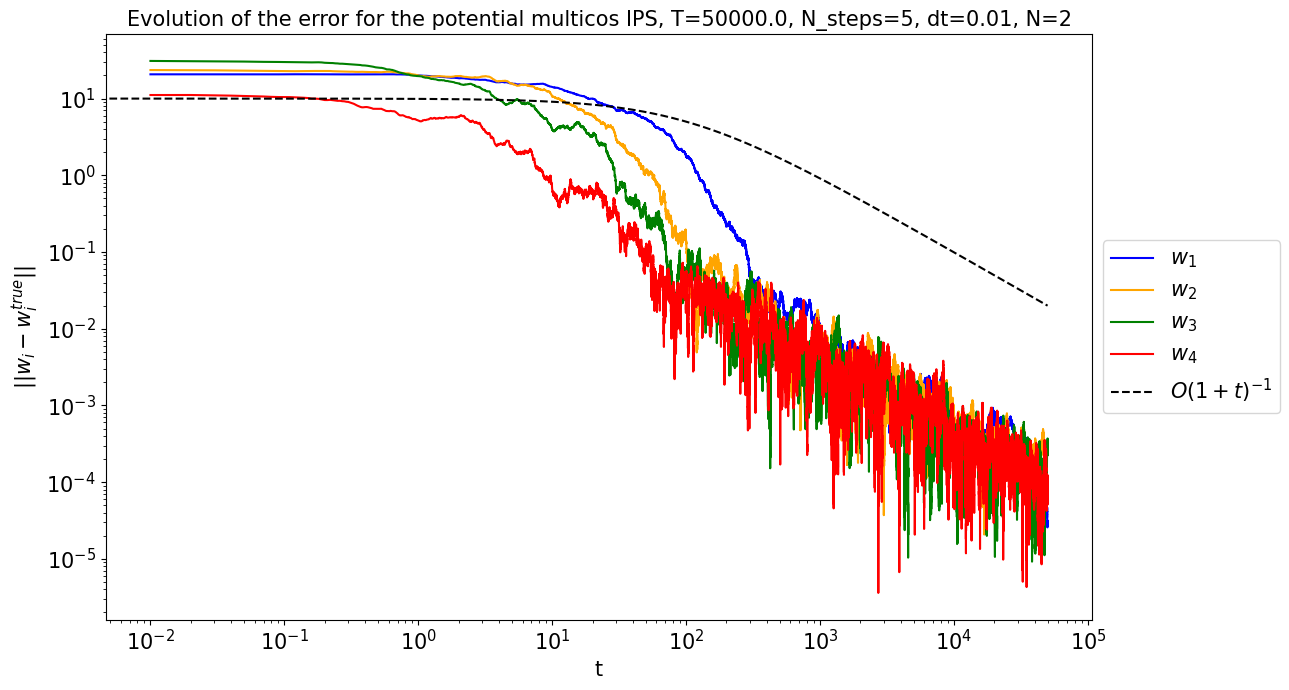

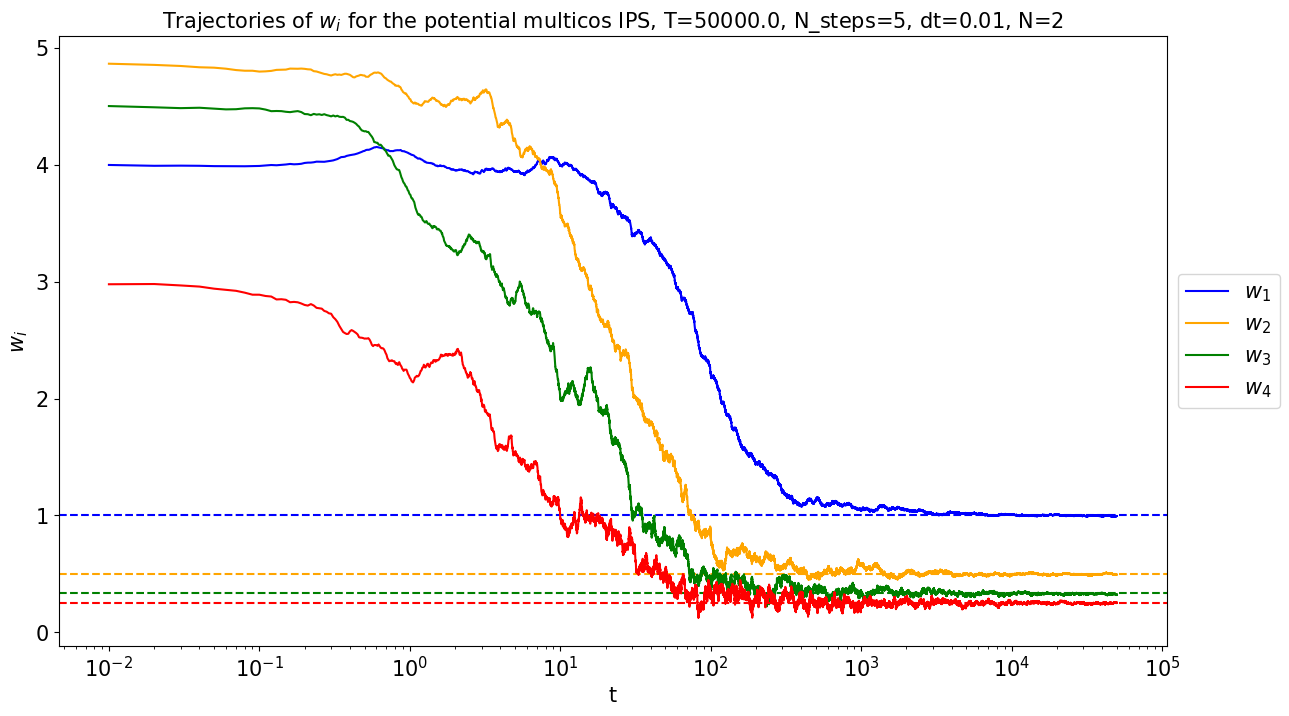

In [15]:
utils.error_analysis(n_steps,T,dt,main_theta,w_true,"plots",dict_,model,saving=True)

#### Study over J (J=2 and J=6)

In [26]:
T = 5e4
N = 2
J = 4
n_steps = 5
dt = 1e-2

In [27]:
model = "potential_multicos"
directory = "data"
path = Path(f"./{directory}/{model}")
w_true = 1/np.arange(1,J+1)
print(w_true)
dict_ = models.dict_(model,N,J,w_true)
#utils.gen_data(n_steps,dt,T,dict_,directory,model)

# asserting the loading is correct
X = np.load(path/f"X_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
print(np.min(X),np.max(X))
dX = np.load(path/f"dX_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
theta_0 = np.load(path/f"theta_0_{int(T)}_{dt}_{dict_['n1']}_{dict_['J']}.npy")

[1.         0.5        0.33333333 0.25      ]
3.212133367208603e-07 6.2831850948095775


In [29]:
# J = 2

dict_["J"] = 2
theta_0_J = theta_0[:,:,:dict_["J"]]

In [30]:
main_theta = utils.main(n_steps,T,dt,dict_,directory,model,self_proc=utils.sgd_torus,theta_0=theta_0_J)

running main utils
w_true: [1.         0.5        0.33333333 0.25      ]
theta shape (5, 2, 2)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [01:58<00:00, 42333.12it/s]


[[0.76619291]
 [0.24058249]]
n_step 1


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [01:59<00:00, 41965.48it/s]


[[0.76148217]
 [0.25269892]]
n_step 2


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [01:58<00:00, 42137.19it/s]


[[0.75650688]
 [0.24679031]]
n_step 3


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [01:57<00:00, 42441.45it/s]


[[0.76548777]
 [0.25501312]]
n_step 4


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [01:57<00:00, 42718.68it/s]

[[0.7654443 ]
 [0.24100144]]


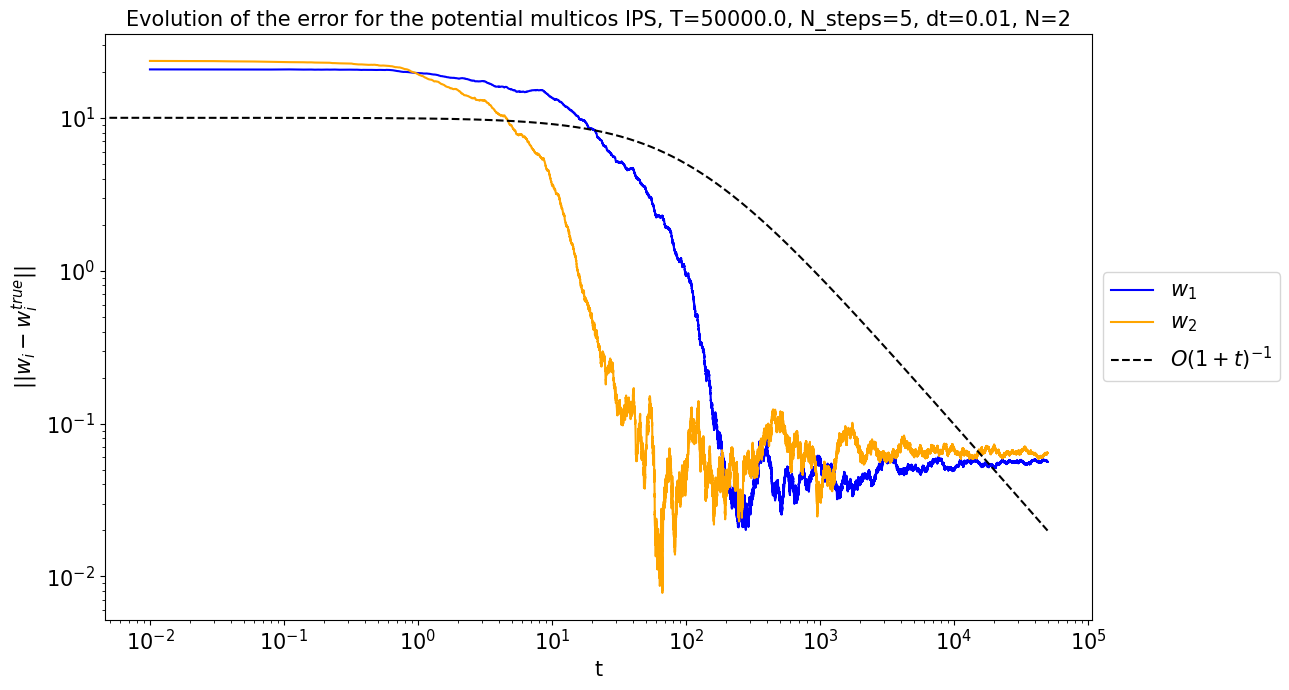

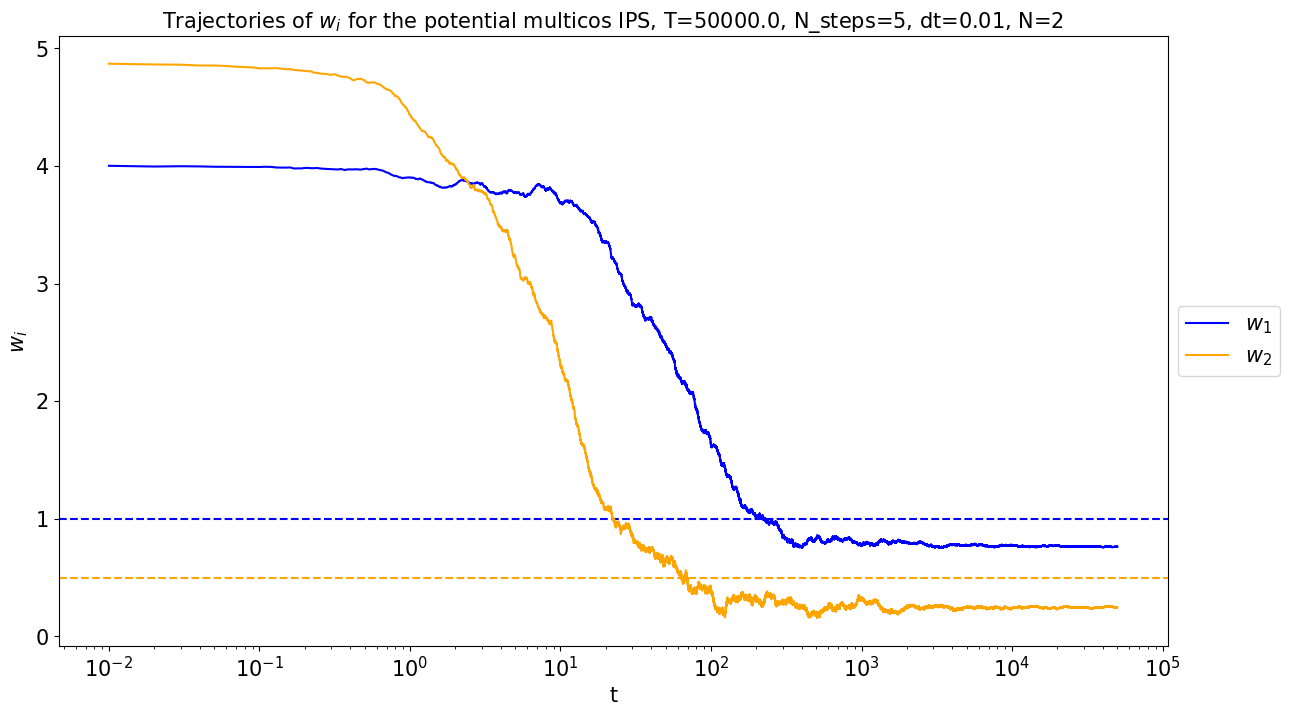

In [31]:
utils.error_analysis(n_steps,T,dt,main_theta,w_true[:dict_["J"]],"plots",dict_,model,saving=True)

In [38]:
# J = 6

dict_["J"] = 6
theta_0_J = np.concatenate((theta_0,
                          st.uniform(loc=0,scale=10).rvs(n_steps*(dict_["J"]-theta_0.shape[2])*dict_['n1']).reshape(n_steps,dict_['n1'],(dict_["J"]-theta_0.shape[2]))),
                        axis = 2)
theta_0_J.shape

(5, 2, 6)

In [39]:
main_theta = utils.main(n_steps,T,dt,dict_,directory,model,self_proc=utils.sgd_torus,theta_0=theta_0_J)

running main utils
w_true: [1.         0.5        0.33333333 0.25      ]
theta shape (5, 2, 6)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:46<00:00, 22118.55it/s]


[[ 0.99389872]
 [ 0.48445919]
 [ 0.32005376]
 [ 0.250279  ]
 [ 0.01018286]
 [-0.00295097]]
n_step 1


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:48<00:00, 21912.24it/s]


[[0.99177345]
 [0.50563766]
 [0.32088827]
 [0.24965201]
 [0.00257403]
 [0.00413096]]
n_step 2


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:48<00:00, 21845.94it/s]


[[ 0.99456428]
 [ 0.49926968]
 [ 0.34063061]
 [ 0.26851169]
 [-0.00874051]
 [ 0.00455341]]
n_step 3


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:45<00:00, 22130.00it/s]


[[ 0.99583478]
 [ 0.50285472]
 [ 0.32147889]
 [ 0.26133834]
 [-0.00990093]
 [ 0.00391399]]
n_step 4


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:47<00:00, 21934.66it/s]


[[ 0.99578972]
 [ 0.48362387]
 [ 0.29891156]
 [ 0.24018949]
 [ 0.00925582]
 [-0.00926637]]


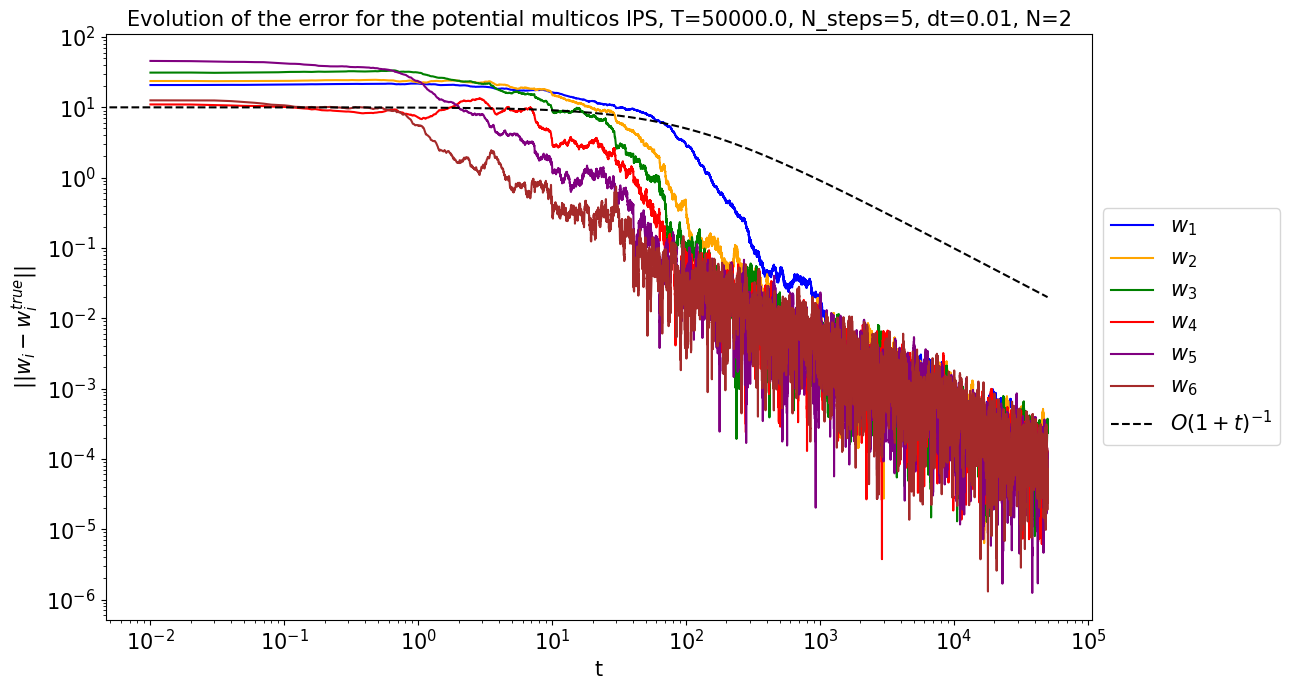

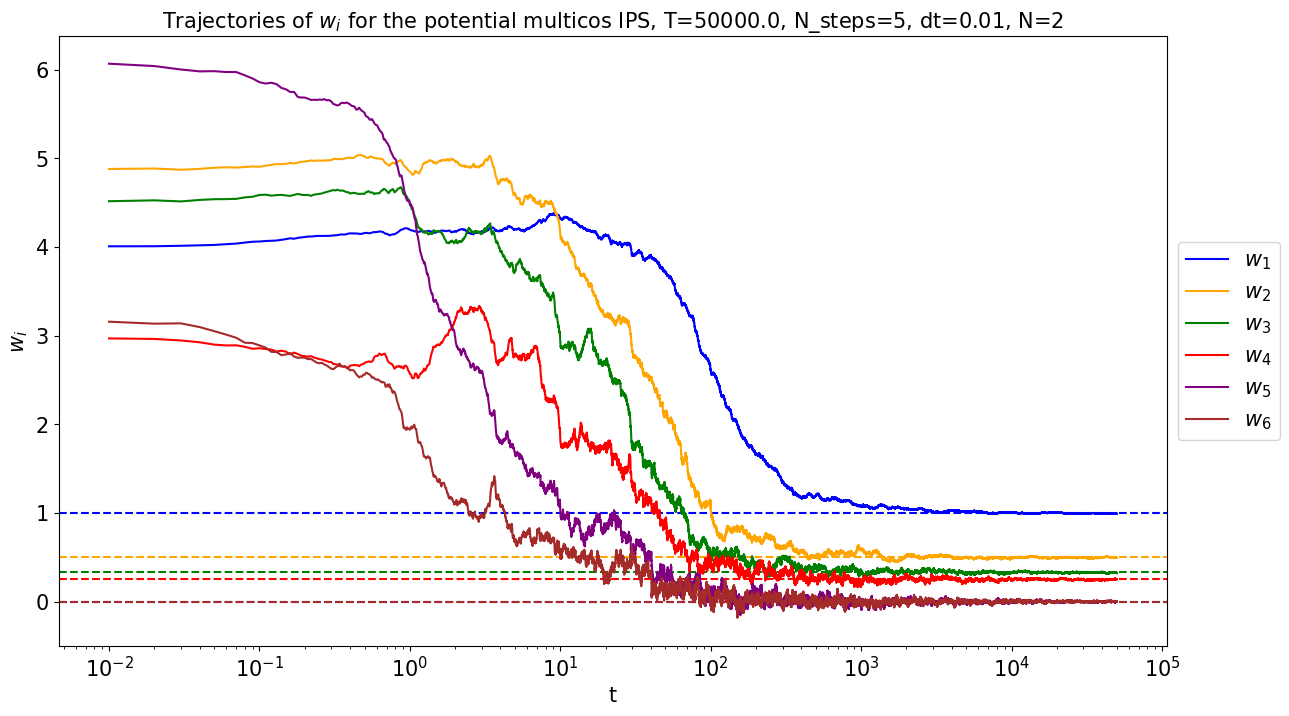

In [44]:
utils.error_analysis(n_steps,T,dt,main_theta,np.concatenate((w_true,[0,0])),"plots",dict_,model,saving=True)

#### Study over N

In [4]:
T = 5e4
J = 4
n_steps = 5
dt = 1e-2
N = 2

In [5]:
model = "potential_multicos"
directory = "data"
path = Path(f"./{directory}/{model}")
w_true = 1/np.arange(1,J+1)
print(w_true)
dict_ = models.dict_(model,N,J,w_true)
theta_0 = np.load(f"./data/{model}/STUDY_N_theta_0_20.npy")

[1.         0.5        0.33333333 0.25      ]


20
[1.         0.5        0.33333333 0.25      ]
1.075344866624528e-08 6.28318529810846
running main utils
w_true: [1.         0.5        0.33333333 0.25      ]


python(28421) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


theta shape (5, 20, 4)
n_step 0


100%|████████████████████████████████████████████████████████████████████████████| 5000000/5000000 [23:51<00:00, 3491.74it/s]


[[0.98299817]
 [0.49274952]
 [0.35131161]
 [0.24074034]]
n_step 1


100%|████████████████████████████████████████████████████████████████████████████| 5000000/5000000 [23:51<00:00, 3493.67it/s]


[[1.0242048 ]
 [0.49899455]
 [0.33065766]
 [0.25422499]]
n_step 2


100%|████████████████████████████████████████████████████████████████████████████| 5000000/5000000 [24:20<00:00, 3422.83it/s]


[[1.00251107]
 [0.49918606]
 [0.32981676]
 [0.25889644]]
n_step 3


100%|████████████████████████████████████████████████████████████████████████████| 5000000/5000000 [24:19<00:00, 3426.26it/s]


[[0.98843559]
 [0.50239546]
 [0.33284551]
 [0.25024594]]
n_step 4


100%|████████████████████████████████████████████████████████████████████████████| 5000000/5000000 [24:17<00:00, 3431.17it/s]


[[0.99691681]
 [0.50364113]
 [0.34344402]
 [0.2418359 ]]


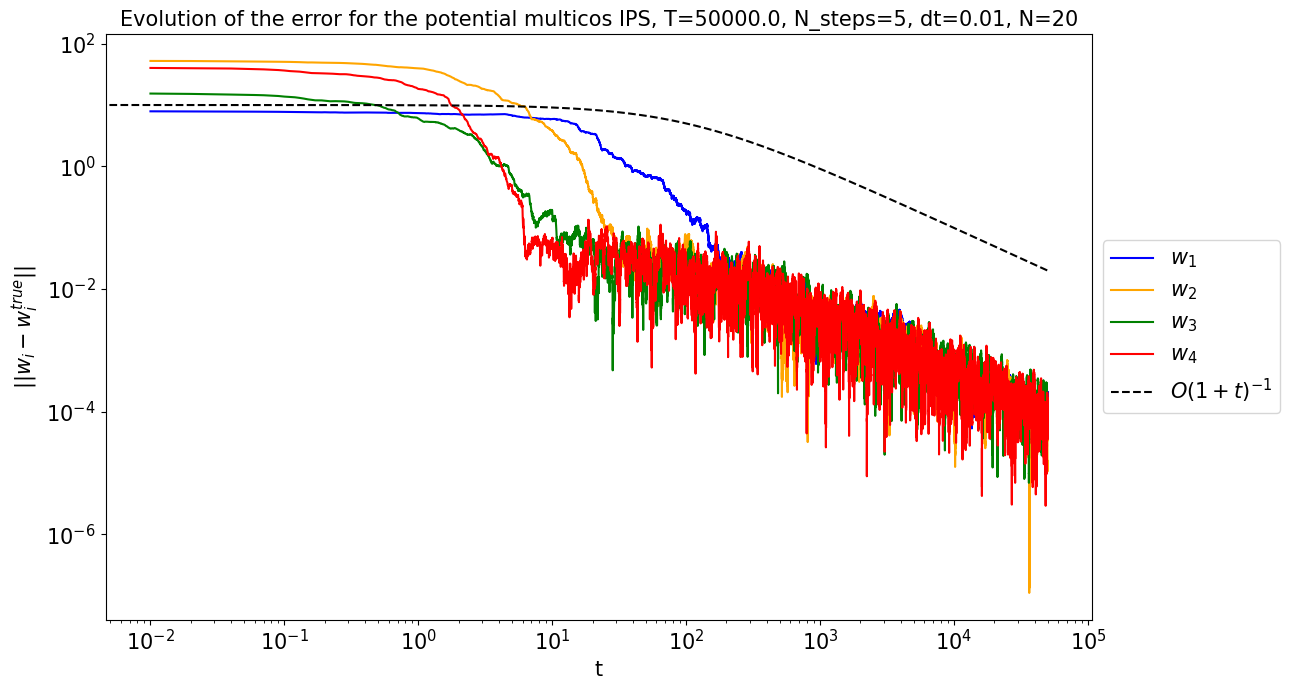

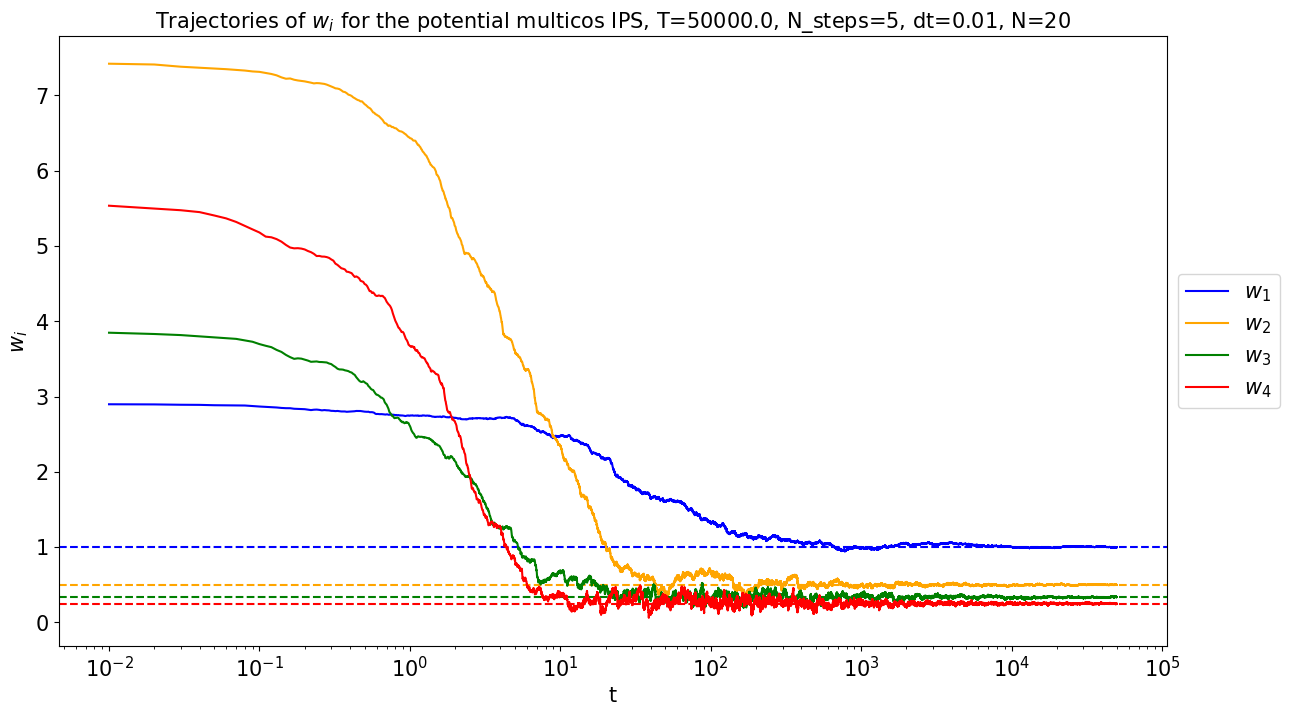

In [8]:
Ns = [20]
for N in Ns:
    print(N)
    print(w_true)
    dict_ = models.dict_(model,N,J,w_true)
    # asserting the loading is correct
    X = np.load(path/f"X_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
    print(np.min(X),np.max(X))
    dX = np.load(path/f"dX_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
    theta_0_current = theta_0[:,:N,:]
    main_theta = utils.main(n_steps,T,dt,dict_,directory,model,utils.sgd_torus,theta_0 = theta_0_current)
    np.save(f"./data/{model}/STUDY_N_main_theta_{N}_new.npy",main_theta)
    utils.error_analysis(n_steps,T,dt,main_theta,w_true,"plots",dict_,model,saving=True)

In [9]:
Ns = [5,10,15,20]
err = np.zeros((len(Ns),int(T/dt)+1,4))
for k,N in enumerate(Ns):
    main_theta = np.load(f"./data/{model}/STUDY_N_main_theta_{N}_new.npy")
    print(main_theta.shape)
    main_theta_est = np.mean(main_theta,axis=0)[:,:,0]
    err[k] = (main_theta_est-w_true)**2

(5, 5000001, 4, 1)
(5, 5000001, 4, 1)
(5, 5000001, 4, 1)
(5, 5000001, 4, 1)


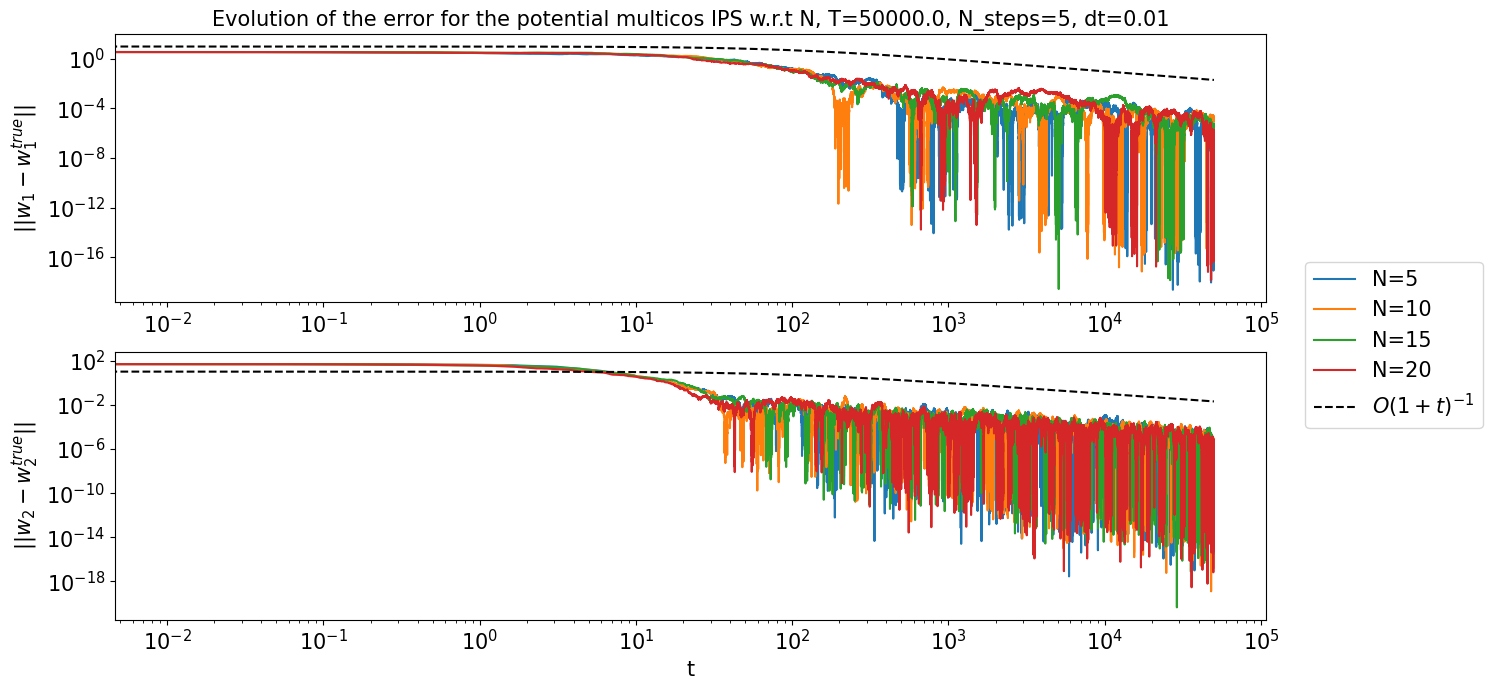

In [10]:
fig, axs = plt.subplots(2,figsize=(13, 7))
x = np.arange(0,T+dt,dt)
y =10/(1+ 0.01*x)
labels= ["N="+str(N) for N in Ns]
axs[0].plot(x,err[:,:,0].T,label=labels)
axs[1].plot(x,err[:,:,1].T)
axs[0].plot(x,y, color = 'k', linestyle = '--',label=r"$O(1+t)^{-1}$")
axs[1].plot(x,y, color = 'k', linestyle = '--')
axs[0].set_title(f"Evolution of the error for the {model.replace('_',' ')} IPS w.r.t N, T={T}, N_steps={n_steps}, dt={dt}",size=15)
axs[0].tick_params(axis='both',labelsize=15)
axs[1].tick_params(axis='both',labelsize=15)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
axs[0].set_ylabel(r'$||w_1-w^{true}_1||$',size = 15)
axs[1].set_ylabel(r'$||w_2-w^{true}_2||$',size = 15)
axs[1].set_xlabel('t',size = 15)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
plt.tight_layout()
plt.savefig(f"./plots/{model}/STUDY_N_SGDCT.png", bbox_inches='tight')

### von Mises

In [16]:
T = 5e4
N = 2
J = 4
n_steps = 5
dt = 1e-2

In [18]:
model = "von_mises"
directory = "data"
path = Path(f"./{directory}/{model}")
dict_ = models.dict_(model,N,J)
w_true = dict_["theta_star_dist"]
print(w_true)
#utils.gen_data(n_step,dt,T,dict_,directory,model)

# asserting the loading is correct
X = np.load(path/f"X_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
print(np.min(X),np.max(X))
dX = np.load(path/f"dX_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
theta_0 = np.load(path/f"theta_0_{int(T)}_{dt}_{dict_['n1']}_{dict_['J']}.npy")

[7.71900241e-02 9.54978986e-03 7.91705177e-04 4.93277443e-05]
4.201854597596366e-08 6.283185288406658


In [19]:
main_theta = utils.main(n_steps,T,dt,dict_,directory,model,self_proc=utils.sgd_torus)

running main utils
w_true: [7.71900241e-02 9.54978986e-03 7.91705177e-04 4.93277443e-05]
theta shape (5, 2, 4)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:02<00:00, 27443.97it/s]


[[ 0.06446786]
 [ 0.00254183]
 [-0.0060609 ]
 [-0.00096217]]
n_step 1


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:00<00:00, 27746.04it/s]


[[ 0.06600715]
 [ 0.02509613]
 [-0.00319609]
 [-0.0098336 ]]
n_step 2


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:00<00:00, 27671.92it/s]


[[ 0.08315173]
 [ 0.01270076]
 [ 0.0094654 ]
 [-0.00210062]]
n_step 3


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:00<00:00, 27762.29it/s]


[[ 0.07715449]
 [-0.00083421]
 [ 0.00083214]
 [ 0.01245881]]
n_step 4


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:00<00:00, 27633.09it/s]


[[ 0.08657314]
 [ 0.02414209]
 [ 0.00070898]
 [-0.01424775]]


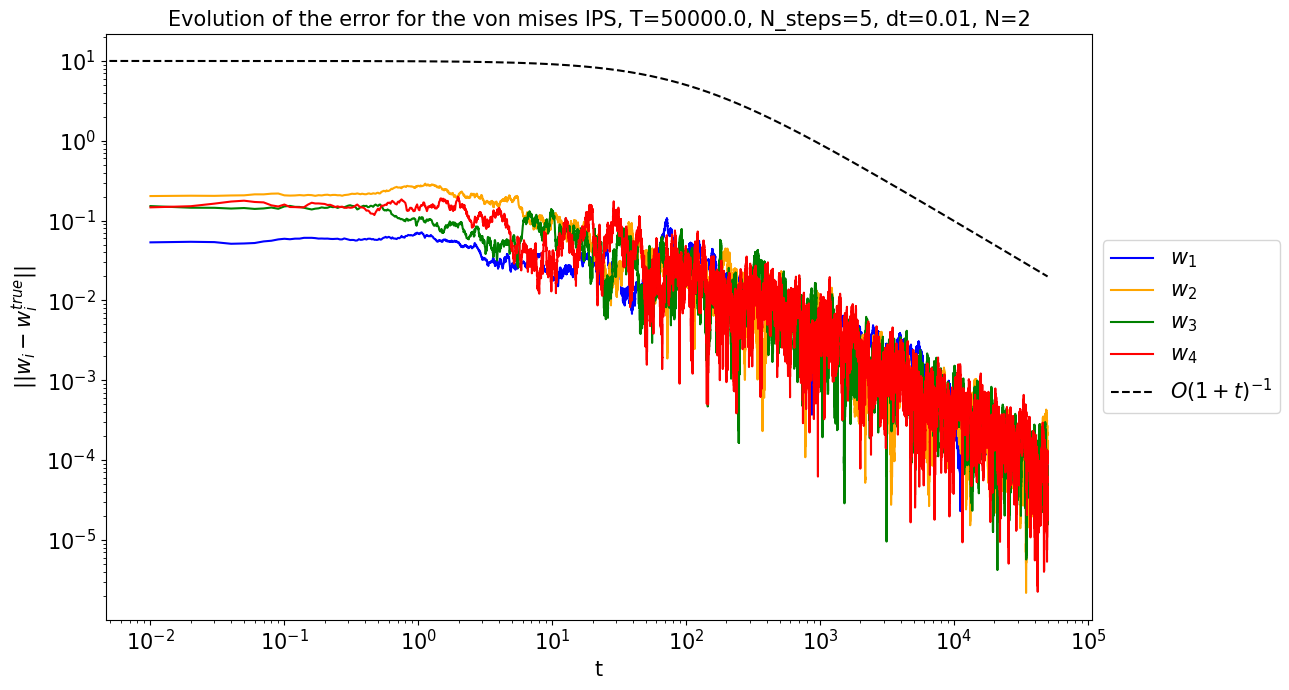

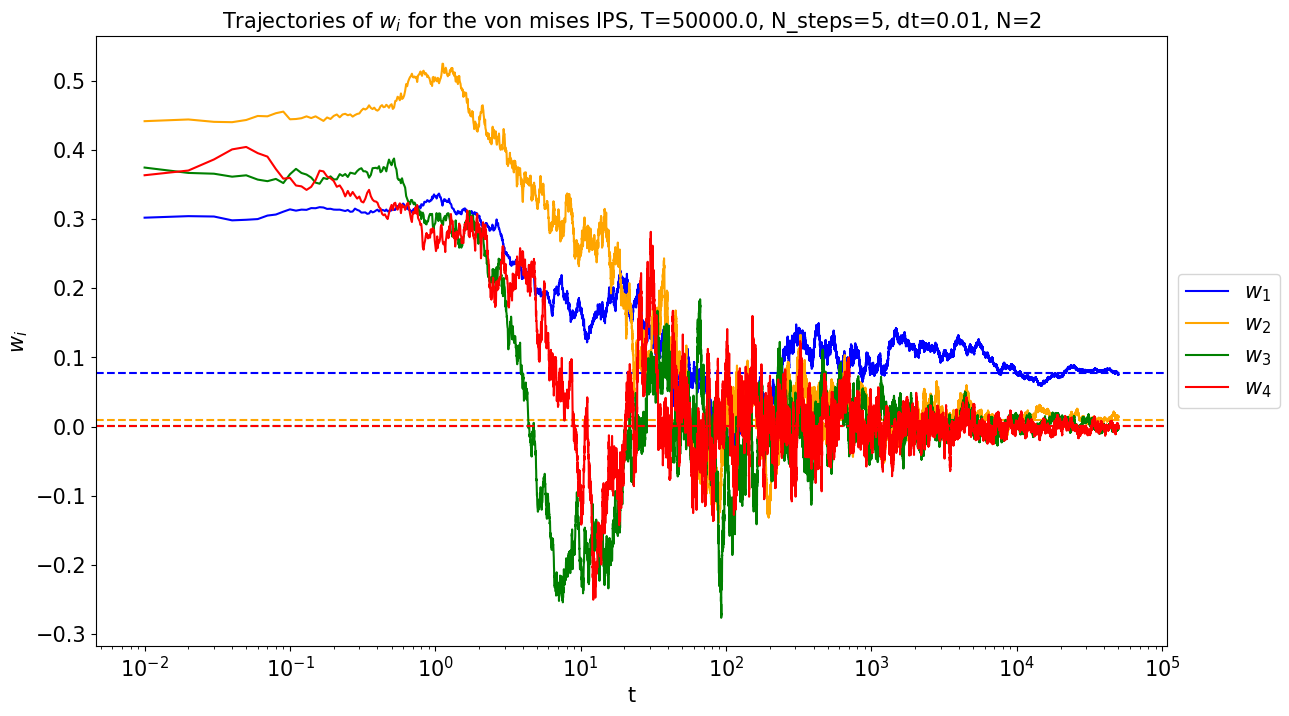

In [21]:
utils.error_analysis(n_steps,T,dt,main_theta,w_true,"plots",dict_,model,saving=True)

### Onsager

In [25]:
T = 5e4
N = 2
J = 4
n_steps = 5
dt = 1e-2

In [26]:
model = "onsager"
directory = "data"
path = Path(f"./{directory}/{model}")
dict_ = models.dict_(model,N,J)

#utils.gen_data(n_step,dt,T,dict_,directory,model)

w_true = dict_["theta_star_dist"]
print(w_true)

X = np.load(path/f"X_{int(T)}_{dt}_{dict_['N']}_{w_true}.npy") # n_step,time,particles,1
print(np.min(X),np.max(X))
dX = np.load(path/f"dX_{int(T)}_{dt}_{dict_['N']}_{w_true}.npy") # n_step,time,particles,1
theta_0 = np.load(path/f"theta_0_{int(T)}_{dt}_{dict_['n1']}_{dict_['J']}.npy")

[ 0.         -0.42441318  0.         -0.08488264]
3.244708945970842e-08 6.283185177275848


In [27]:
main_theta = utils.main(n_steps,T,dt,dict_,directory,model,self_proc=utils.sgd_torus)

running main utils
w_true: [ 0.         -0.42441318  0.         -0.08488264]
theta shape (5, 2, 4)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:58<00:00, 27994.75it/s]


[[-0.00971813]
 [-0.41807541]
 [ 0.0010457 ]
 [-0.08192742]]
n_step 1


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:00<00:00, 27646.21it/s]


[[-0.00163997]
 [-0.42955355]
 [ 0.0028882 ]
 [-0.09185645]]
n_step 2


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:01<00:00, 27549.54it/s]


[[ 0.00405748]
 [-0.43559322]
 [ 0.00566371]
 [-0.09994492]]
n_step 3


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:01<00:00, 27599.29it/s]


[[ 0.00903769]
 [-0.42438945]
 [ 0.00505724]
 [-0.09567585]]
n_step 4


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:02<00:00, 27348.17it/s]


[[-0.00810663]
 [-0.4185932 ]
 [-0.00386158]
 [-0.10476475]]


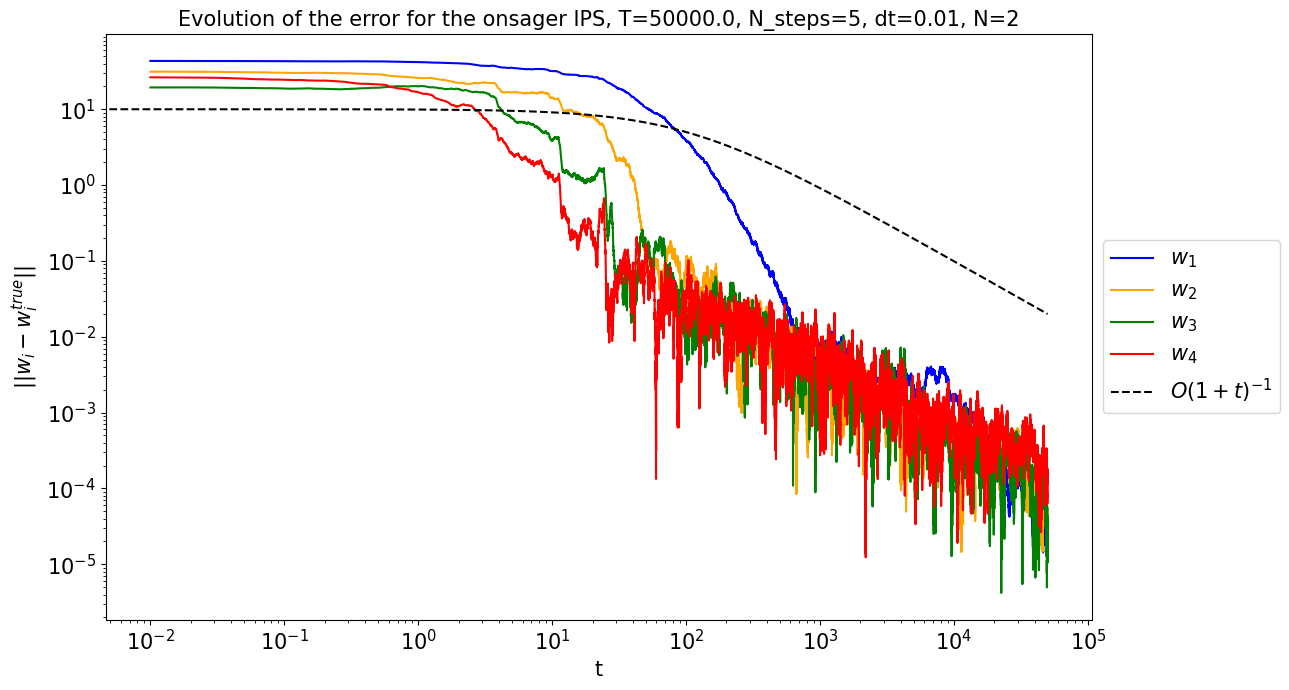

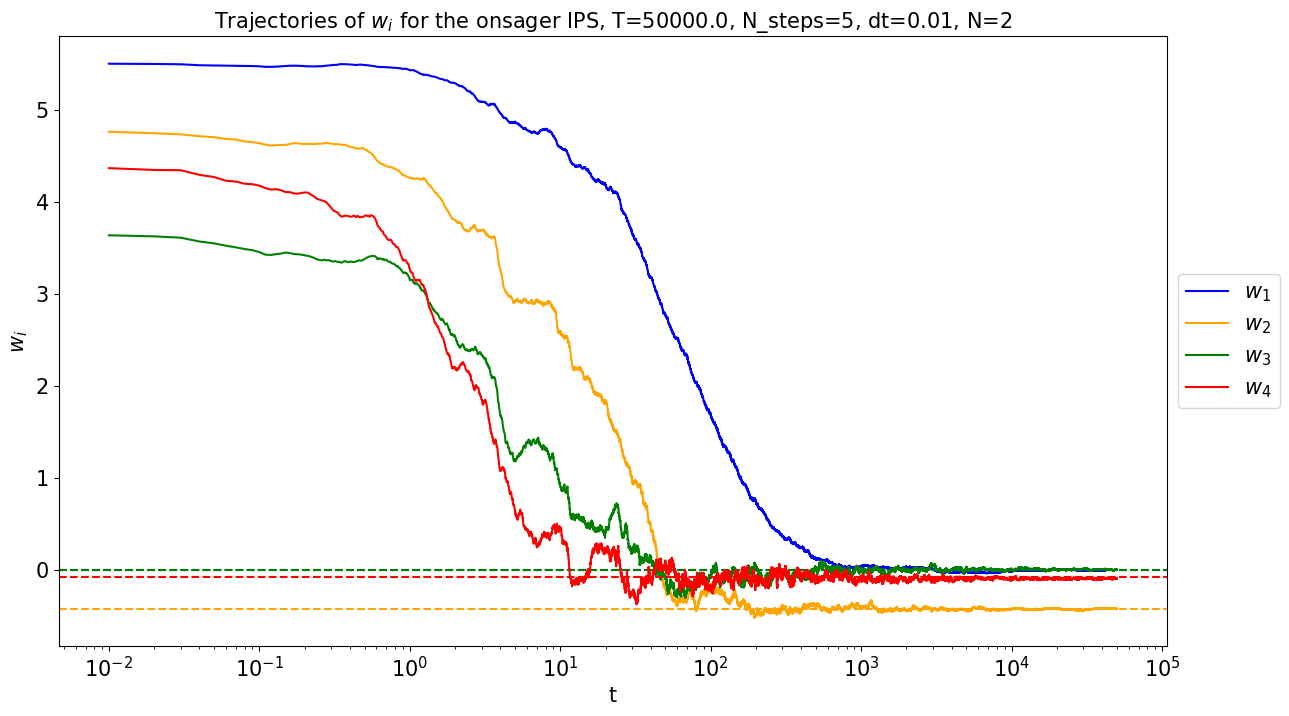

In [28]:
utils.error_analysis(n_step,T,dt,main_theta,w_true,"plots",dict_,model,saving=True)

### Opinion dynamics

In [29]:
T = 5e4
N = 2
J = 4
n_step = 5
dt = 1e-2

In [31]:
model = "opinion"
directory = "data"
path = Path(f"./{directory}/{model}")
dict_ = models.dict_(model,N,J)

#utils.gen_data(n_step,dt,T,dict_,directory,model)

w_true = dict_["theta_star_dist"]
print(w_true)

X = np.load(path/f"X_{int(T)}_{dt}_{dict_['N']}_{w_true}.npy") # n_step,time,particles,1
print(np.min(X),np.max(X))
dX = np.load(path/f"dX_{int(T)}_{dt}_{dict_['N']}_{w_true}.npy") # n_step,time,particles,1
theta_0 = np.load(path/f"theta_0_{int(T)}_{dt}_{dict_['n1']}_{dict_['J']}.npy")

[-1.57630714  0.0804495   0.19047918 -0.27822701]
5.27662589178135e-08 6.283185022220082


In [32]:
main_theta = utils.main(n_steps,T,dt,dict_,directory,model,self_proc=utils.sgd_torus)

running main utils
w_true: [-1.57630714  0.0804495   0.19047918 -0.27822701]
theta shape (5, 2, 4)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:00<00:00, 27670.68it/s]


[[-1.36239721]
 [ 0.15649937]
 [-0.04008695]
 [ 0.02401229]]
n_step 1


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:00<00:00, 27681.11it/s]


[[-1.38455097]
 [ 0.16103832]
 [-0.08368889]
 [ 0.01741357]]
n_step 2


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:57<00:00, 28099.82it/s]


[[-1.36534443]
 [ 0.17264069]
 [-0.06049247]
 [ 0.01613645]]
n_step 3


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:57<00:00, 28226.59it/s]


[[-1.39106353]
 [ 0.16642386]
 [-0.05916593]
 [ 0.02635088]]
n_step 4


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:57<00:00, 28113.00it/s]


[[-1.36483037]
 [ 0.17607363]
 [-0.05849691]
 [ 0.00306913]]


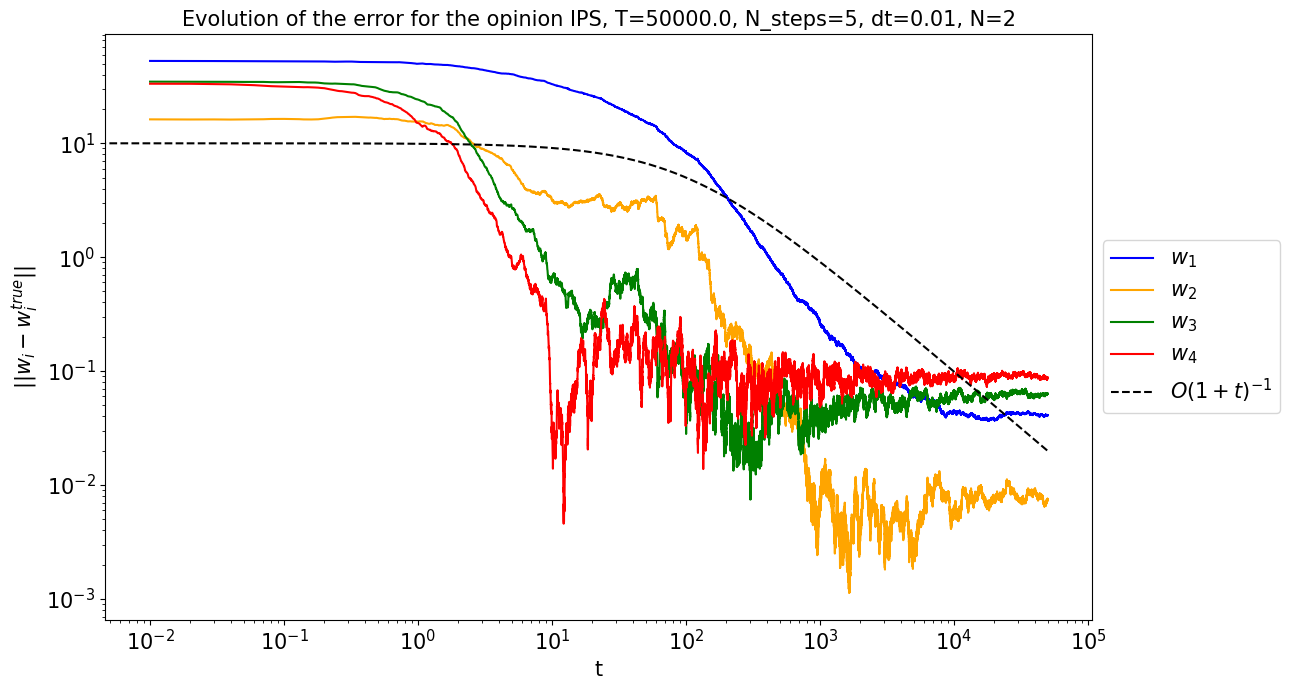

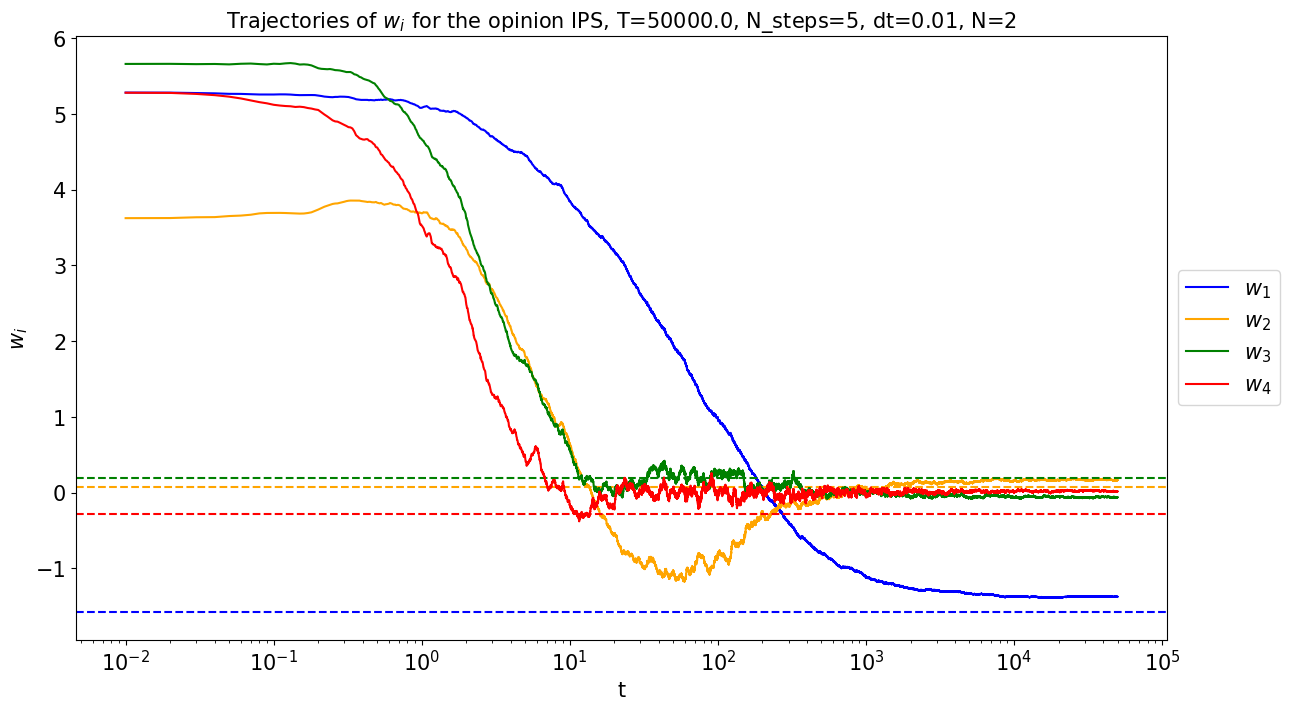

In [33]:
utils.error_analysis(n_step,T,dt,main_theta,w_true,"plots",dict_,model,saving=True)

## On the real line

### Multi Hermite potential

In [34]:
T = 5e4
N = 2
J = 4
n_steps = 5
dt = 1e-2

In [42]:
model = "potential_multihermite"
directory = "data"
path = Path(f"./{directory}/{model}")
dict_ = models.dict_(model,N,J)
w_true = dict_["theta_star_dist"]
print(w_true)
#utils.gen_data(n_step,dt,T,dict_,directory,model)

# asserting the loading is correct
X = np.load(path/f"X_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
print(np.min(X),np.max(X))
dX = np.load(path/f"dX_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
theta_0 = np.load(path/f"theta_0_{int(T)}_{dt}_{dict_['n1']}_{dict_['J']}.npy") # n_step,time,particles,1

[1.         0.5        0.33333333 0.25      ]
-6.1454414586756325 4.775261707236318


In [37]:
main_theta = utils.main(n_steps,T,dt,dict_,directory,model,self_proc=utils.sgd_hermite)

running main utils
w_true: [1.         0.5        0.33333333 0.25      ]
theta shape (5, 2, 4)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:00<00:00, 27699.44it/s]


[[1.00044558]
 [0.49210737]
 [0.34692547]
 [0.24594344]]
n_step 1


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:58<00:00, 28079.07it/s]


[[0.99717188]
 [0.49361612]
 [0.3369647 ]
 [0.25034313]]
n_step 2


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:01<00:00, 27517.14it/s]


[[1.00171143]
 [0.49177513]
 [0.34259217]
 [0.24068213]]
n_step 3


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:02<00:00, 27342.27it/s]


[[0.99700631]
 [0.49399824]
 [0.33580981]
 [0.25106753]]
n_step 4


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [03:00<00:00, 27655.87it/s]


[[1.00433152]
 [0.5033895 ]
 [0.31807812]
 [0.23319122]]


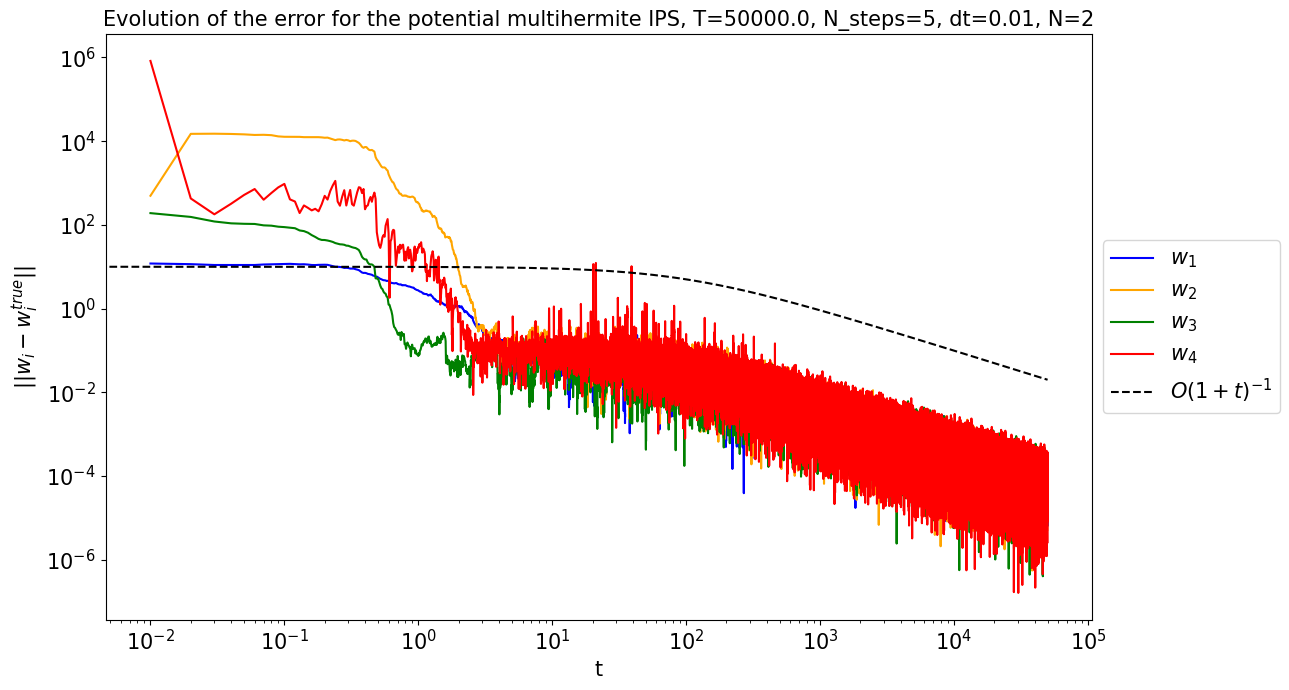

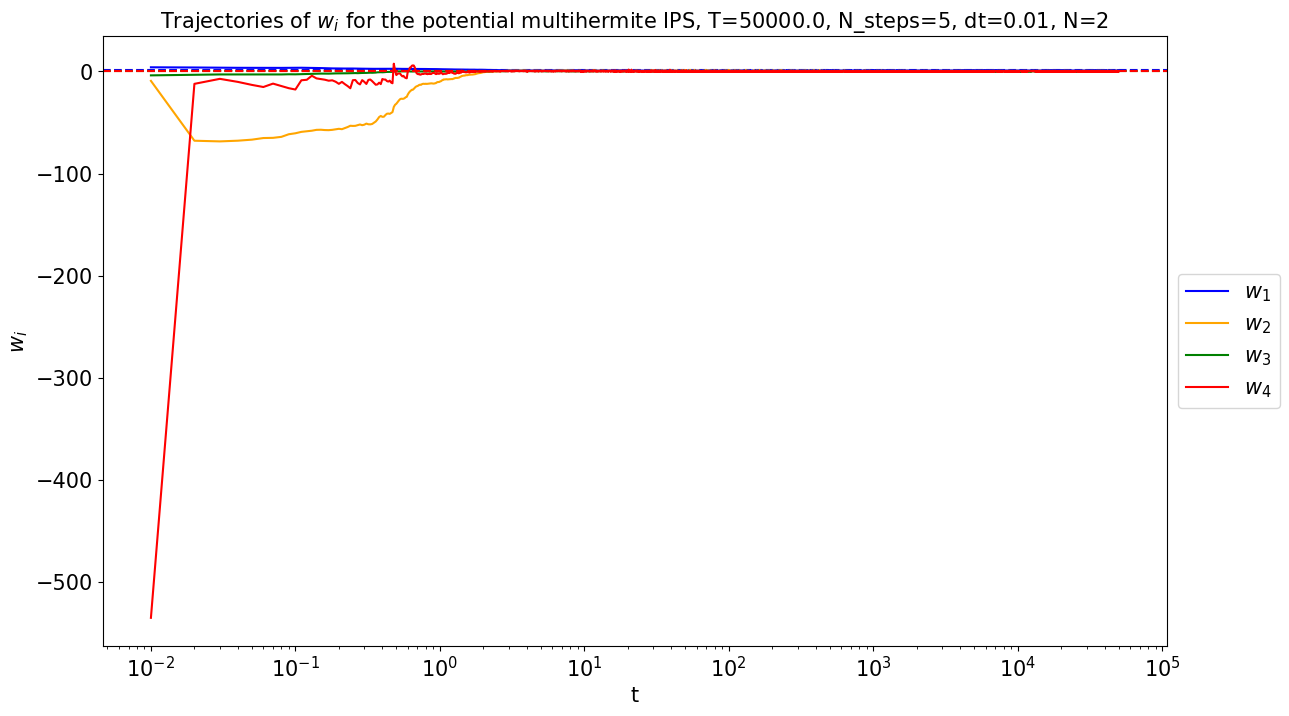

In [43]:
utils.error_analysis(n_steps,T,dt,main_theta,w_true,"plots",dict_,model,saving=True)

### Curie-Weiss

In [11]:
T = 5e4
N = 2
J = 2
n_steps = 5
dt = 1e-2

In [12]:
model = "curie_weiss"
directory = "data"
path = Path(f"./{directory}/{model}")
dict_ = models.dict_(model,N,J)
#utils.gen_data(n_step,dt,T,dict_,directory,model,periodic=False)

w_true = dict_["theta_star_dist"]
print(w_true)

# asserting the loading is correct
X = np.load(path/f"X_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
print(np.min(X),np.max(X))
dX = np.load(path/f"dX_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
theta_0 = np.load(path/f"theta_0_{int(T)}_{dt}_{dict_['n1']}_{dict_['J']}.npy") # n_step,time,particles,1

[0.     0.0625]
-3.523958483928884 3.423103039454579


In [48]:
main_theta = utils.main(n_steps,T,dt,dict_,directory,model,self_proc=utils.sgd_hermite)

running main utils
w_true: [0.     0.0625]
theta shape (5, 2, 2)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:02<00:00, 40674.68it/s]


[[-0.00700965]
 [ 0.05970631]]
n_step 1


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:02<00:00, 40686.44it/s]


[[-0.00193208]
 [ 0.07495771]]
n_step 2


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:02<00:00, 40821.86it/s]


[[-0.00334767]
 [ 0.0507924 ]]
n_step 3


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:04<00:00, 40111.68it/s]


[[-0.00520324]
 [ 0.05973276]]
n_step 4


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:04<00:00, 40190.77it/s]

[[-0.00373819]
 [ 0.05497578]]


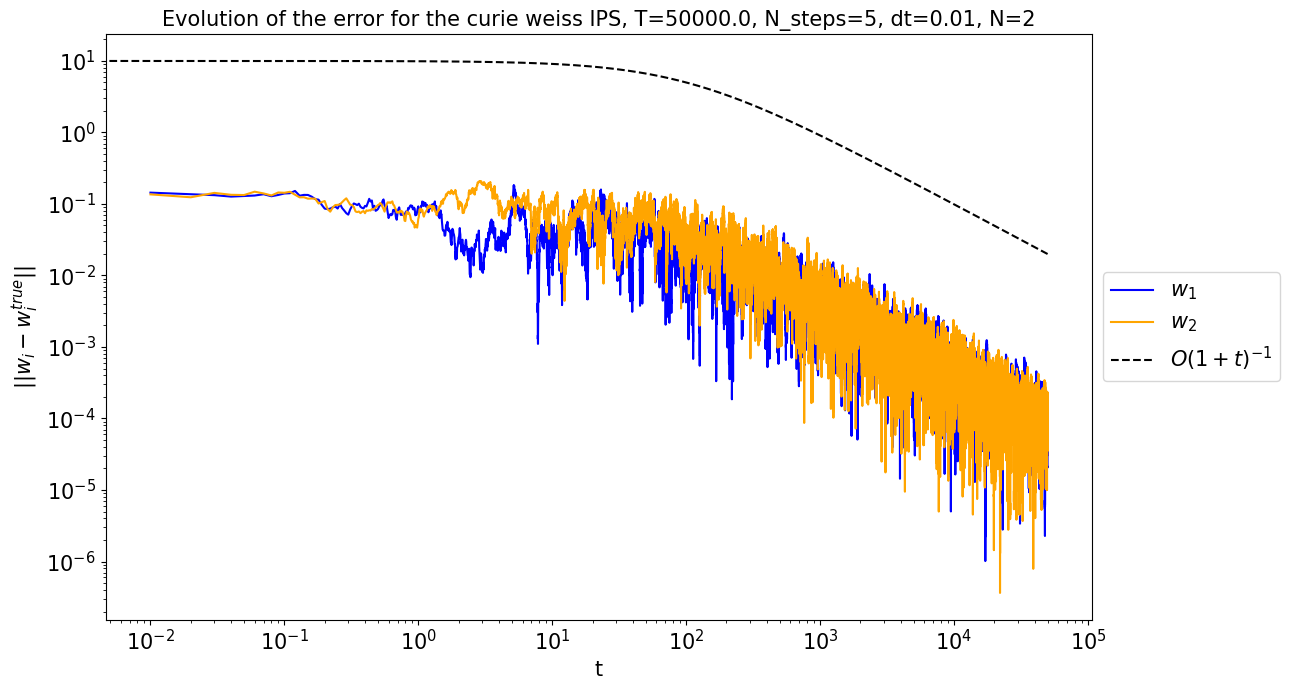

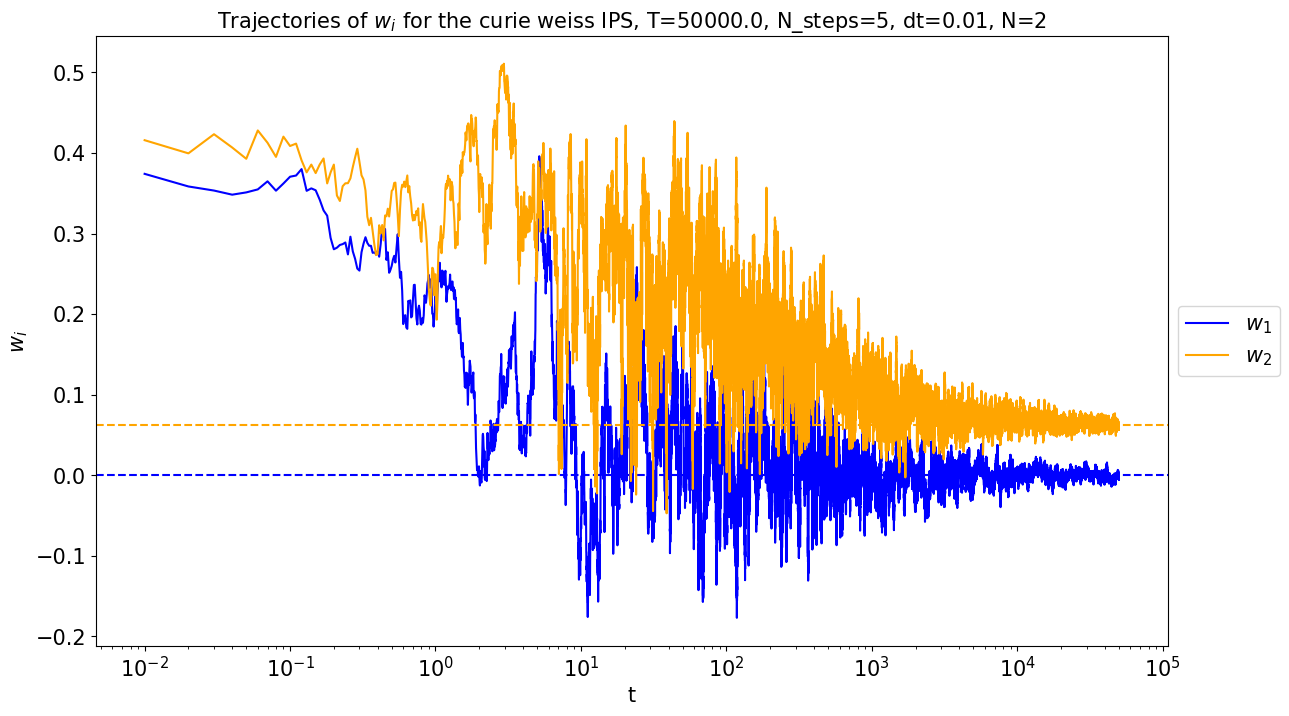

In [49]:
utils.error_analysis(n_steps,T,dt,main_theta,w_true,"plots",dict_,model,saving=True)

#### Mean field limit

In [56]:
T = 5e4
N = 200
J = 2
n_steps = 1
dt = 1e-2

In [50]:
model = "curie_weiss"
directory = "data"
path = Path(f"./{directory}/{model}")
dict_ = models.dict_(model,N,J)
#utils.gen_data(n_step,dt,T,dict_,directory,model,periodic=False)

w_true = dict_["theta_star_dist"]
print(w_true)

# asserting the loading is correct
X = np.load(path/f"X_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
print(np.min(X),np.max(X))
dX = np.load(path/f"dX_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
theta_0 = np.load(path/f"theta_0_{int(T)}_{dt}_{dict_['n1']}_{dict_['J']}.npy") # n_step,time,particles,1

[0.     0.0625]
-3.4284611285468305 3.4174577573846556


In [54]:
dict_["n1"] = 2
main_theta = utils.main(n_steps,T,dt,dict_,directory,model,utils.sgd_hermite,
                        Xs=X[:,:,:dict_["n1"],:],dXs=dX[:,:,:dict_["n1"],:],theta_0=theta_0[:,:dict_["n1"],:])

running main utils
w_true: [0.     0.0625]
theta shape (1, 2, 2)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:32<00:00, 32703.05it/s]


[[0.0027166 ]
 [0.05476287]]


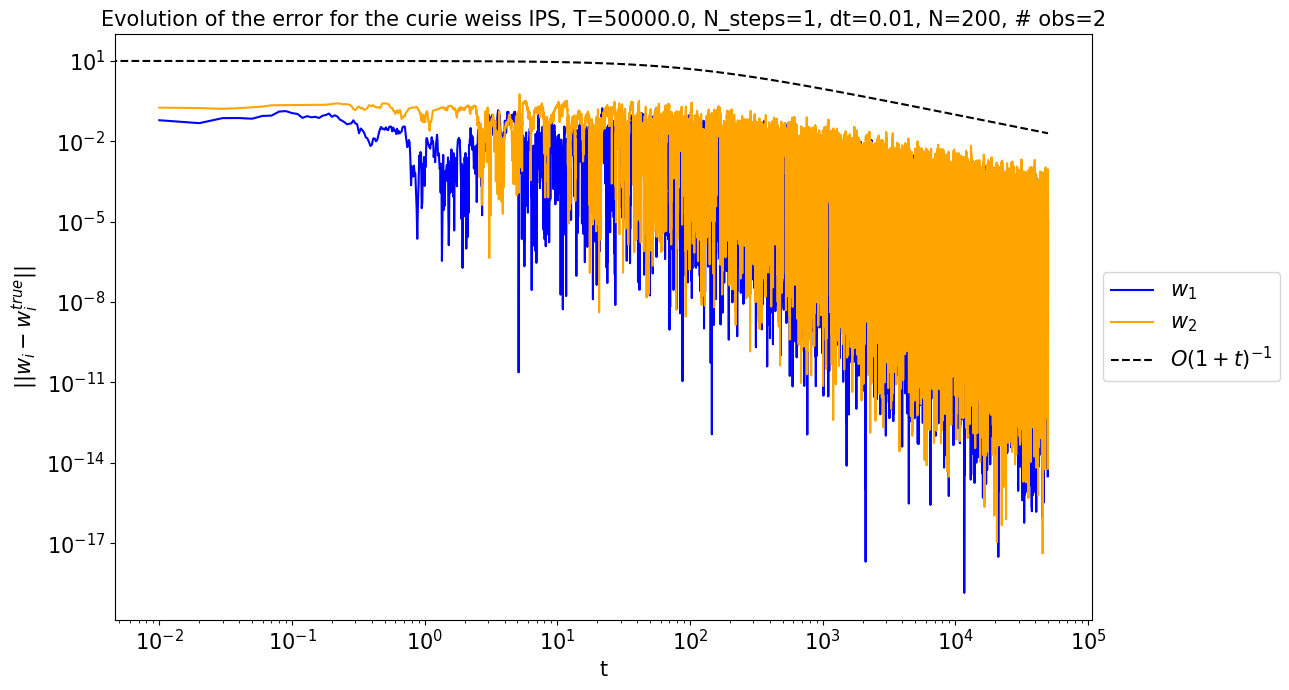

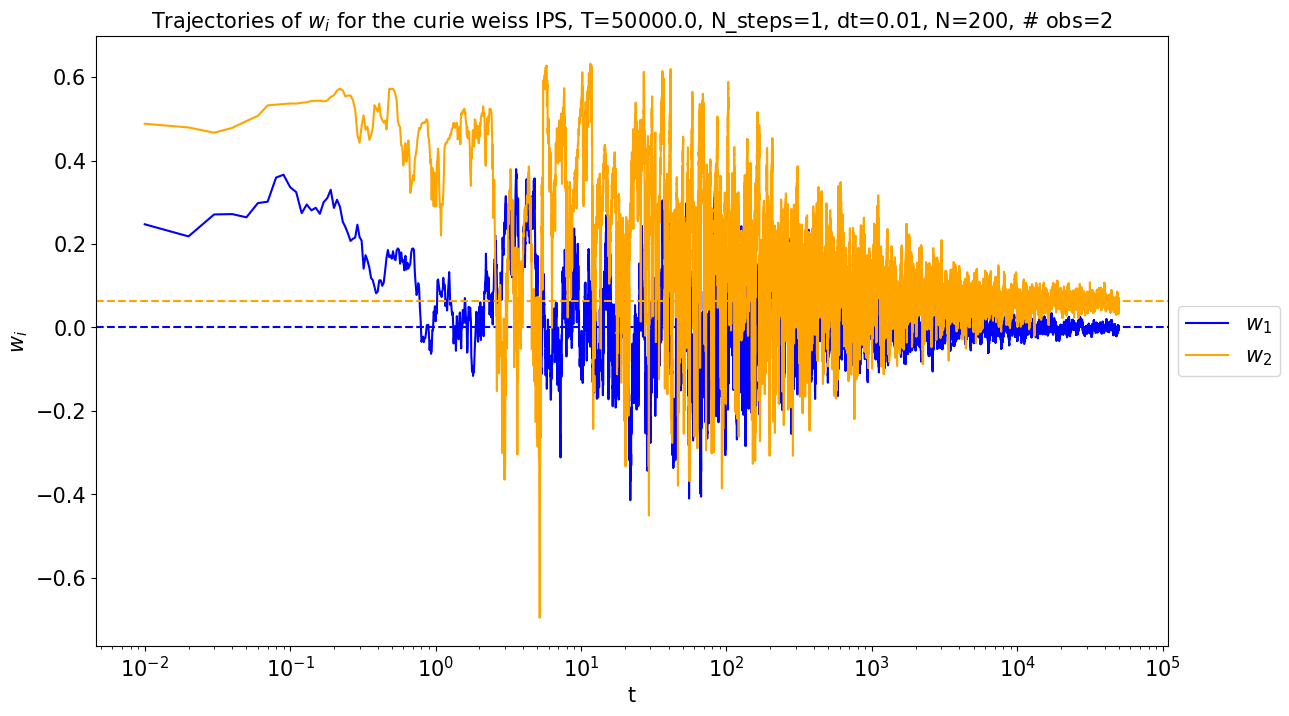

In [55]:
utils.error_analysis(n_steps,T,dt,main_theta,w_true,"plots",dict_,model,saving=True,sub=True)

#### Study over N

In [3]:
T = 5e4
J = 2
n_steps = 5
dt = 1e-2
N = 2

In [4]:
model = "curie_weiss"
directory = "data"
path = Path(f"./{directory}/{model}")
dict_ = models.dict_(model,N,J)
w_true = dict_["theta_star_dist"]
print(w_true)
theta_0 = np.load(f"./data/{model}/STUDY_N_theta_0_20.npy")

[0.     0.0625]


In [8]:
Ns = [5,10,15,20]
err = np.zeros((len(Ns),int(T/dt)+1,2))
for k,N in enumerate(Ns):
    main_theta = np.load(f"./data/{model}/STUDY_N_main_theta_{N}_new.npy")
    print(main_theta.shape)
    main_theta_est = np.mean(main_theta,axis=0)[:,:,0]
    err[k] = (main_theta_est-w_true)**2

(5, 5000001, 2, 1)
(5, 5000001, 2, 1)
(5, 5000001, 2, 1)
(5, 5000001, 2, 1)


In [ ]:
fig, axs = plt.subplots(figsize=(13, 7))
x = np.arange(0,T+dt,dt)
y =10/(1+ 0.01*x)
labels= ["N="+str(N) for N in Ns]
plt.plot(x[1:],err[1:,:,0].T,label=labels)
plt.plot(x,y, color = 'k', linestyle = '--',label=r"$O(t)^{-1}$")

plt.title(f"Evolution of the error for the {model.replace('_',' ')} IPS w.r.t N - MLE, T={T}, N_steps={n_steps}, dt={dt}",size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.ylabel(r'$||w_i-w^{true}_i||$',size = 15)
plt.xlabel('t',size = 15)
axs.set_xscale('log')
axs.set_yscale('log')
plt.tight_layout()
plt.savefig(f"./plots/{model}/STUDY_N_SGDCT.png", bbox_inches='tight')

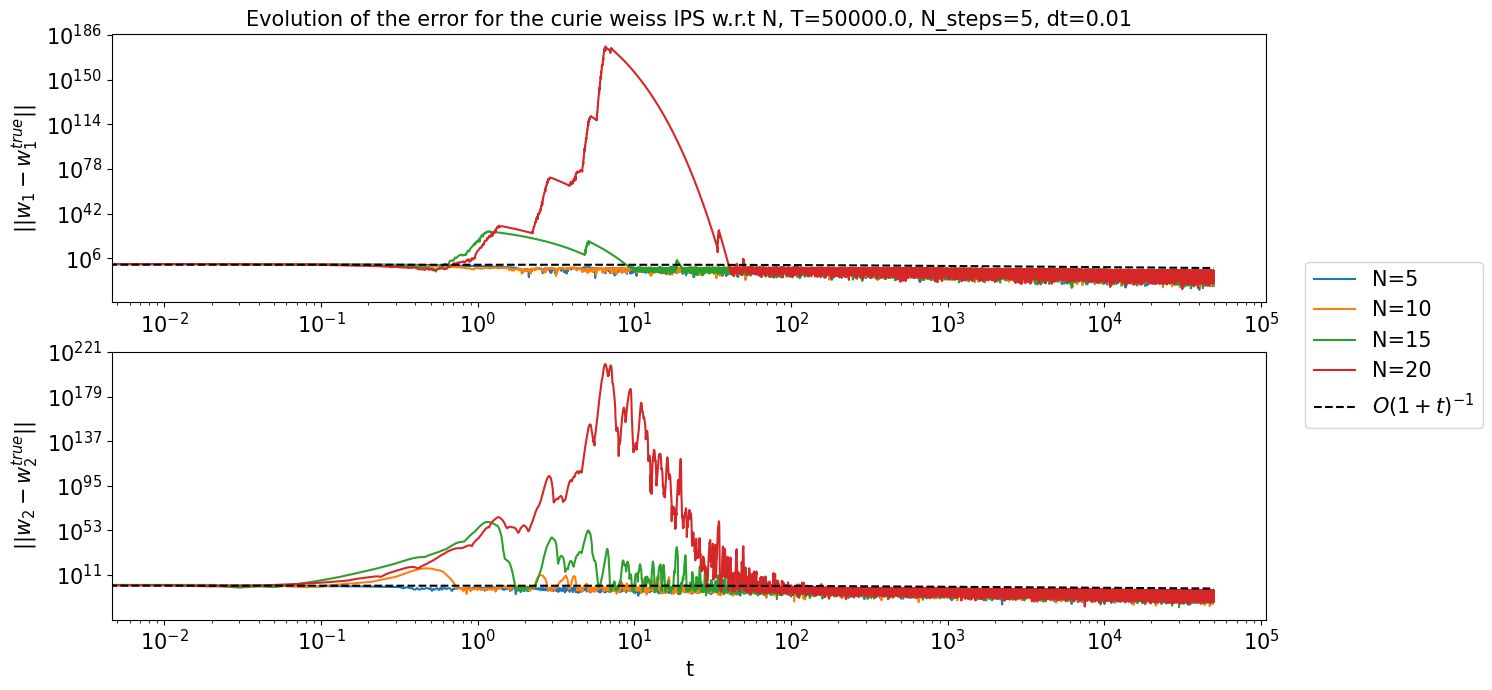

In [9]:
fig, axs = plt.subplots(2,figsize=(13, 7))
x = np.arange(0,T+dt,dt)
y =10/(1+ 0.01*x)
labels= ["N="+str(N) for N in Ns]
axs[0].plot(x,err[:,:,0].T,label=labels)
axs[1].plot(x,err[:,:,1].T)
axs[0].plot(x,y, color = 'k', linestyle = '--',label=r"$O(1+t)^{-1}$")
axs[1].plot(x,y, color = 'k', linestyle = '--')
axs[0].set_title(f"Evolution of the error for the {model.replace('_',' ')} IPS w.r.t N, T={T}, N_steps={n_steps}, dt={dt}",size=15)
axs[0].tick_params(axis='both',labelsize=15)
axs[1].tick_params(axis='both',labelsize=15)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
axs[0].set_ylabel(r'$||w_1-w^{true}_1||$',size = 15)
axs[1].set_ylabel(r'$||w_2-w^{true}_2||$',size = 15)
axs[1].set_xlabel('t',size = 15)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
plt.tight_layout()
plt.savefig(f"./plots/{model}/STUDY_N_SGDCT.png", bbox_inches='tight')

#### Adding measurement noise

In [11]:
T = 5e4
N = 2
J = 2
n_step = 1
dt = 1e-2

In [13]:
model = "curie_weiss"
directory = "data"
path = Path(f"./{directory}/{model}")
dict_ = models.dict_(model,N,J)

w_true = dict_["theta_star_dist"]
print(w_true)

# asserting the loading is correct
X = np.load(path/f"X_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
#print(np.min(X),np.max(X))
dX = np.load(path/f"dX_{int(T)}_{dt}_{dict_['N']}_{w_true.astype(float)}.npy") # n_step,time,particles,1
theta_0 = np.load(path/f"theta_0_{int(T)}_{dt}_{dict_['n1']}_{dict_['J']}.npy") # n_step,time,particles,1

[0.     0.0625]


In [16]:
sigmas = [0.01,0.05,0.1,0.2,0.5,1]
dict_sigmas = {}
noise_normal = st.norm.rvs(scale=1,size=np.prod(X.shape)).reshape(X.shape)
for sig in sigmas:
    noise = sig*noise_normal
    print(noise.shape)
    Y = X + noise
    dY = np.diff(Y,axis=1)    
    main_theta = utils.main(n_step,T,dt,dict_,directory,model,utils.sgd_hermite,
                            Xs=Y,dXs=dY,theta_0=theta_0)
    dict_sigmas[sig] = main_theta
    print(np.mean(main_theta,axis=0)[-1])

(5, 5000001, 2, 1)
running main utils
w_true: [0.     0.0625]
theta shape (5, 2, 2)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:03<00:00, 40561.25it/s]


[[-0.00699511]
 [ 0.06349976]]
[[-0.00699511]
 [ 0.06349976]]
(5, 5000001, 2, 1)
running main utils
w_true: [0.     0.0625]
theta shape (5, 2, 2)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:05<00:00, 39975.51it/s]


[[-0.00693694]
 [ 0.1494964 ]]
[[-0.00693694]
 [ 0.1494964 ]]
(5, 5000001, 2, 1)
running main utils
w_true: [0.     0.0625]
theta shape (5, 2, 2)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:05<00:00, 39892.51it/s]


[[-0.00686424]
 [ 0.40925782]]
[[-0.00686424]
 [ 0.40925782]]
(5, 5000001, 2, 1)
running main utils
w_true: [0.     0.0625]
theta shape (5, 2, 2)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:05<00:00, 39861.72it/s]


[[-0.00671882]
 [ 1.34594113]]
[[-0.00671882]
 [ 1.34594113]]
(5, 5000001, 2, 1)
running main utils
w_true: [0.     0.0625]
theta shape (5, 2, 2)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:04<00:00, 40039.44it/s]


[[-0.00628258]
 [ 5.25363916]]
[[-0.00628258]
 [ 5.25363916]]
(5, 5000001, 2, 1)
running main utils
w_true: [0.     0.0625]
theta shape (5, 2, 2)
n_step 0


100%|███████████████████████████████████████████████████████████████████████████| 5000000/5000000 [02:05<00:00, 39989.89it/s]

[[-5.55550735e-03]
 [ 9.19174032e+00]]
[[-5.55550735e-03]
 [ 9.19174032e+00]]


[[0.    ]
 [0.0625]]
[[0.    ]
 [0.0625]]
[[0.    ]
 [0.0625]]
[[0.    ]
 [0.0625]]
[[0.    ]
 [0.0625]]
[[0.    ]
 [0.0625]]


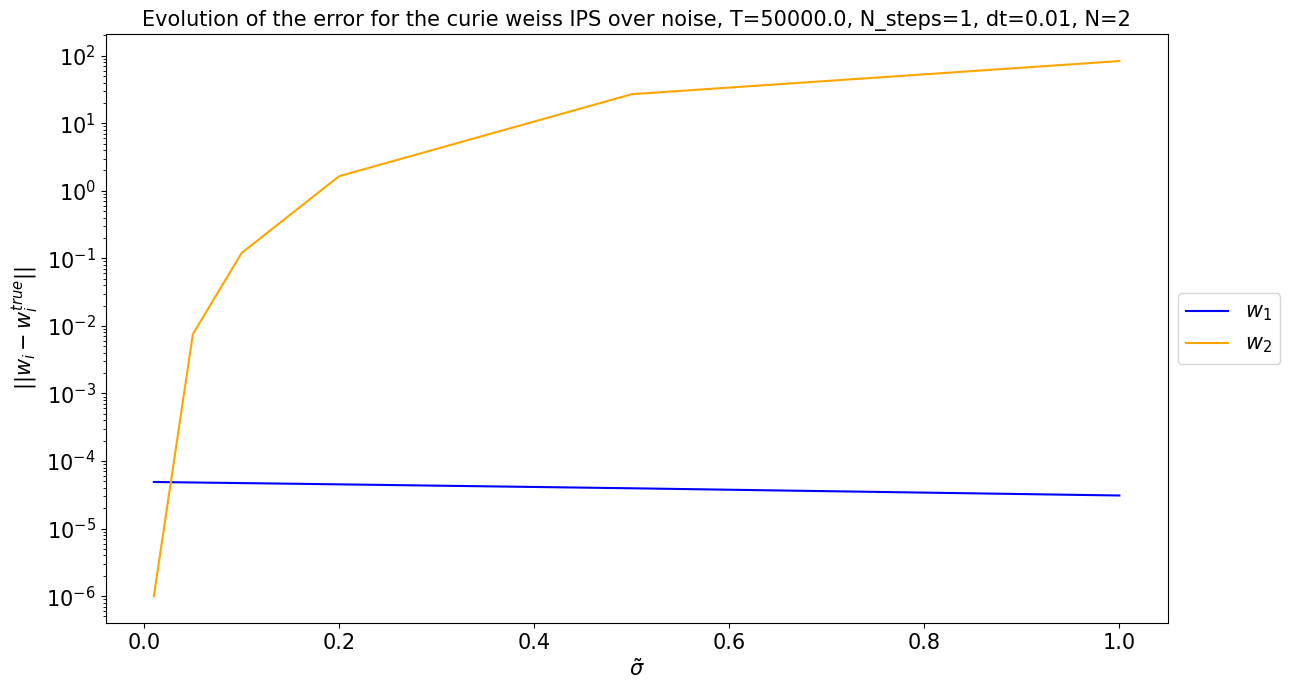

In [25]:
fig, axs = plt.subplots(figsize=(13, 7))
colors = ['b', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'k', 'yellow']
w_true = np.array(w_true)
errs = np.zeros((len(sigmas),2))
for i,sig in enumerate(sigmas):
    main_theta = dict_sigmas[sig]
    weights = np.mean(main_theta,axis=0)[-1]
    print(w_true.reshape(-1,1))
    errs[i] = ((weights-w_true.reshape(-1,1))**2).flatten()
for j in range(dict_['J']):
    plt.plot(sigmas, errs[:,j],color = colors[j%(len(colors))], label = "$w_{%r}$" %(j+1))
plt.title(f"Evolution of the error for the {model.replace('_',' ')} IPS over noise, T={T}, N_steps={1}, dt={dt}, N={N}",size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=15)
plt.ylabel(r'$||w_i-w^{true}_i||$',size = 15)
plt.xlabel(r"$\tilde{\sigma}$",size = 15)
axs.set_yscale('log')
plt.tight_layout()
plt.savefig("plots/curie_weiss/error_noise.png")